# Python for GIS (Optional)

This notebook introduces basic geospatial analysis in Python using GeoPandas. It's designed for researchers who have used GIS tools like QGIS or ArcGIS, but are new to Python for spatial data.

## 1. Introduction

**GeoPandas** is a Python library for working with spatial (vector) data. It lets you:
- Load and analyze shapefiles or GeoJSONs
- Plot maps and explore spatial patterns
- Automate repetitive GIS tasks
- Combine spatial and tabular data for reproducible research

Using code for GIS workflows makes it easier to repeat analyses, process many files, and share your work.

### Data 
(Data downloaded on 4th of May 2025)

- [Gothenburg Administrative boundaries](https://goteborg.se/wps/portal/enhetssida/statistik-och-analys/geografi/omradesindelningar/gisskikt-for-stadens-omradesindelning)
- [Openstreetmaps](https:/openstreetmaps.org) 

- [Herkules (optional)](https://herkules.slu.se/get/)

## 2. Getting Started with GeoPandas

Let's load a sample GeoJSON file (e.g. building footprints from Lantmäteriet).

If you try to `import geopandas as gpd` you will most likely get an error saying `ModuleNotFoundError: No module named 'geopandas'`

This is because the `geopandas` python library that helps with processing spatial data is not installed in the `btpython` virtual environment.

To install it, go to your terminal and type :
- `conda activate btpython`  
- `conda install geopandas`  
- Confirm installation by typing `y` for yes  

In [1]:
# Data path (note the direction of the slashes)
admin_boundary_path = "data/raw/admin_boundaries/JUR_PRIMÄROMRÅDEN_XU_region.shp"
building_footprints_path = "data/raw/building_footprints/building_footprints.gpkg"

In [2]:
# Load the required libraries
import geopandas as gpd

# Load the shapefile using geopandas
admin_boundaries = gpd.read_file(admin_boundary_path)

# Preview the first few rows of the data
admin_boundaries.head()

c:\Users\ssanjay\AppData\Local\Continuum\anaconda3\lib\site-packages\geopandas\_compat.py:115: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


SW_MEMBER          AJOUR_DATU  KVALITET OPERATÖR PRIMÄROMRÅ  \
0     3101.0  20250108180028.000       0.0  SBKANAL        207   
1     3102.0  20250108180028.000       0.0  SBKANAL        503   
2     3103.0  20250108180029.000       0.0  SBKANAL        709   
3     3104.0  20250108180029.000       0.0  SBKANAL        521   
4     3117.0  20250108180029.000       0.0  SBKANAL        114   

            REG_DATUM  AREA_KM2  PRIMÄRNAMN  \
0  20250108180028.000      1.56   Kärralund   
1  20250108180028.000      2.30       Hagen   
2  20250108180029.000      1.56   Jättesten   
3  20250108180029.000      5.71       Näset   
4  20250108180029.000      0.40  Lorensberg   

                                            geometry  
0  POLYGON Z ((150858.297 6398361.927 0.000, 1508...  
1  POLYGON Z ((143669.001 6395921.228 0.000, 1438...  
2  POLYGON Z ((144337.556 6399473.697 0.000, 1442...  
3  MULTIPOLYGON Z (((143863.798 6388391.881 0.000...  
4  POLYGON Z ((148964.542 6397197.711 0.000, 1489...

c:\Users\ssanjay\AppData\Local\Continuum\anaconda3\lib\site-packages\geopandas\plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<AxesSubplot:>

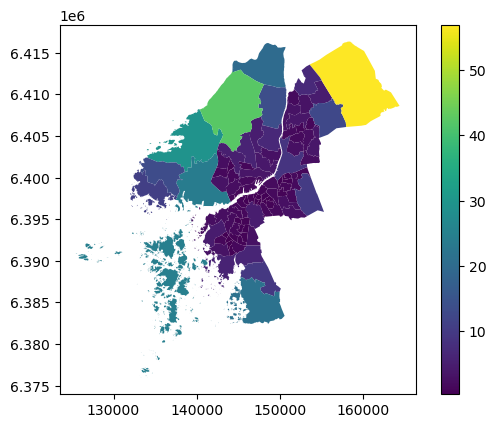

In [3]:
# Plot the buildings coloured by AREA_KM2 and with labels from PRIMÄRNAMN 
admin_boundaries.plot(column='AREA_KM2',
                      cmap='viridis',
                      legend=True,)

c:\Users\ssanjay\AppData\Local\Continuum\anaconda3\lib\site-packages\geopandas\plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<AxesSubplot:>

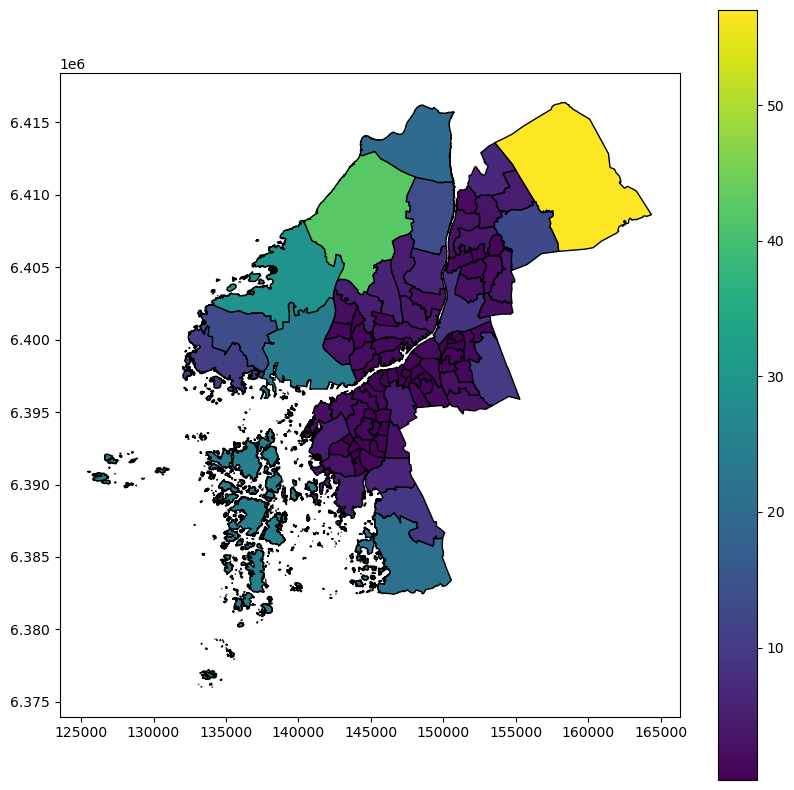

In [4]:
# Dissolve admin boundaries by PRIMÄRNAMN
admin_boundaries_dissolved = admin_boundaries.dissolve(by='PRIMÄRNAMN')
admin_boundaries_dissolved.plot(column='AREA_KM2',
                                 cmap='viridis',
                                 legend=True,
                                 figsize=(10, 10),
                                 edgecolor='black')

In [ ]:
admin_boundaries.explore()

In [ ]:
# Load building footprints using geopandas (!!slow!!)
building_footprints = gpd.read_file(building_footprints_path)

# Preview the first few rows of the data
building_footprints.head()

element_type    osmid    building  \
0          way  4714675     parking   
1          way  4732220     parking   
2          way  4769938  industrial   
3          way  4769946     parking   
4          way  4769947     parking   

                                            geometry  
0  POLYGON ((11.85959 57.72780, 11.86057 57.72779...  
1  POLYGON ((11.85525 57.73122, 11.85530 57.73170...  
2  POLYGON ((11.84811 57.72405, 11.84830 57.72405...  
3  POLYGON ((11.86395 57.72742, 11.86401 57.72741...  
4  POLYGON ((11.86642 57.72666, 11.86683 57.72689...

In [ ]:
#clip the building footprints to the administrative boundaries
building_footprints_clipped = gpd.clip(building_footprints, admin_boundaries)

# Save the clipped building footprints to a new geopackage file
building_footprints_clipped.plot()

c:\Users\ssanjay\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: PROJCS["SWEREF99 12 00",GEOGCS["SWEREF99",DATUM["S ...

  
c:\Users\ssanjay\AppData\Local\Continuum\anaconda3\lib\site-packages\geopandas\plotting.py:684: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


<AxesSubplot:>

ValueError: cannot convert float NaN to integer

<Figure size 640x480 with 1 Axes>

In [ ]:
# Check the coordinate reference system (CRS)
print("CRS of admin boundary:", admin_boundaries.crs)
print("CRS of building footprints:", building_footprints.crs)


CRS of admin boundary: PROJCS["SWEREF99 12 00",GEOGCS["SWEREF99",DATUM["SWEREF99",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6619"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",12],PARAMETER["scale_factor",1],PARAMETER["false_easting",150000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","3007"]]
CRS of building footprints: epsg:4326


In [ ]:
# Ensure the CRS of both layers are the same
project_crs = admin_boundaries.crs
building_footprints = building_footprints.to_crs(project_crs)

print("CRS of building footprints after reprojection:", building_footprints.crs)

CRS of building footprints after reprojection: PROJCS["SWEREF99 12 00",GEOGCS["SWEREF99",DATUM["SWEREF99",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6619"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",12],PARAMETER["scale_factor",1],PARAMETER["false_easting",150000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","3007"]]


In [ ]:
boundaries_dissolved = admin_boundaries.dissolve(by='PRIMÄRNAMN', aggfunc='first')

In [ ]:
# Clip again
building_footprints_clipped = gpd.clip(building_footprints, boundaries_dissolved)

In [ ]:
# Quick preview of the data
building_footprints_clipped.head()

## 3. Exploring Spatial Data

- Check available columns and geometry types
- Plot by attribute (e.g. building type, if available)
- Filter by attribute

In [ ]:
# List columns and geometry type
print(admin_boundaries.columns)
print(admin_boundaries.geom_type.unique())

In [ ]:
# Plot type of unique buildings in the "building" column
print(building_footprints_clipped["building"].unique())

In [ ]:
# Get value counts of the "building" column
print(building_footprints_clipped["building"].value_counts())

## 4. Simple Spatial Operations

- Clip buildings by neighbourhood
- Get summary stats of the buildings

In [ ]:
# Select the geometry for the neighborhood named 'Haga'
# This returns a GeoSeries with one row, so we use .iloc[0] to get the actual Polygon
haga = admin_boundaries[admin_boundaries['PRIMÄRNAMN'] == 'Haga'].geometry.iloc[0]

# Select all buildings that intersect (touch or overlap) with the Haga boundary
haga_buildings = building_footprints_clipped[building_footprints_clipped.intersects(haga)]



In [ ]:
# Plot the buildings in haga
haga_buildings.plot(color='blue', alpha=0.5, edgecolor='k')

In [ ]:
# Create a column for the area of each building in square meters
haga_buildings['area_m2'] = haga_buildings.geometry.area

# Plot a histogram of the building areas per building type ("building" column)
haga_buildings['area_m2'].hist(by=haga_buildings['building'], bins=20, figsize=(10, 6))

## 6. Exporting

You can save your results for use in GIS or reports.

In [ ]:
# Save as geopackage
haga_buildings.to_file('data/processed/haga_buildings.gpkg', driver='GPKG')
